Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 0.2898 - val_loss: 0.1345
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.1300 - val_loss: 0.1043
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1068 - val_loss: 0.0907
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0957 - val_loss: 0.0836
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0900 - val_loss: 0.0799
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0870 - val_loss: 0.0778
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0856 - val_loss: 0.0767
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0844 - val_loss: 0.0760
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0843 - val_loss: 0.0756
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0839 - val_loss: 0.0752
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0835 - val_loss: 0.0749
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━

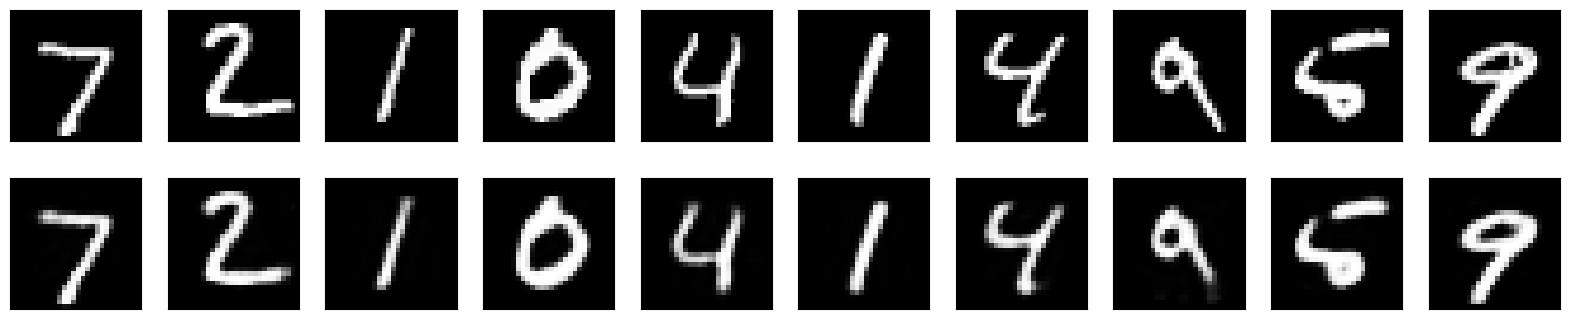

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for the autoencoder
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
encoding_dim = 64  # Size of the encoded representations
input_img = Input(shape=(784,))
noisy_input = GaussianNoise(0.2)(input_img)  # Add Gaussian noise to input
encoded = Dense(encoding_dim, activation='relu')(noisy_input)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Encode the test images
encoded_imgs = encoder.predict(x_test)

# Decode the encoded images
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
